<a href="https://colab.research.google.com/github/DariusTheGeek/Prediction-of-bank-account-ownership/blob/master/predicting_whether_an_individual_has_a_bank_account_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question:
##**Create a model which can predict individuals who are most likely to have or use a bank account**

## Importing and cleaning data

### Importing Libraries

In [0]:
# Importing libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

### Reading the data

In [0]:
# Loading the csv dataset into a pandas dataframe
# Dataset url = 'http://bit.ly/FinancialDataset'
#
df = pd.read_csv('http://bit.ly/FinancialDataset')

### Checking the data

In [0]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Determining the no. of records together with some information in our dataset
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# Previewing statistical summary of the dataset
#
df.describe(include = 'all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1741,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [0]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Checking the shape of the dataframe
#
df.shape

(23524, 13)

In [0]:
# Checking for the size of the dataframe
#
df.size

305812

##Tidying the dataset

### Renaming columns

In [0]:
# Tidying the column names for easier referencing
# First the column names are changed to lower case
# and then spaces in the column names are replaced with an underscore
#
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [0]:
# Previewing the column names to confirm whether they have been renamed successfully
#
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
# Removing typos from columns
#
df.rename(columns={'the_relathip_with_head':'the_relationship_with_head', 'level_of_educuation':'level_of_education' }, inplace=True)
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

### Changing column datatypes

In [0]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                        object
year                            int64
uniqueid                       object
has_a_bank_account             object
type_of_location               object
cell_phone_access              object
household_size                float64
respondent_age                float64
gender_of_respondent           object
the_relationship_with_head     object
marital_status                 object
level_of_education             object
type_of_job                    object
dtype: object

In [0]:
# Changing the column datatypes to appriopriate datatypes
# All the columns other than household_size and respondent_age are categorical
# A for loop is used to iterate through the columns and changing them to categorical dtypes
#
for column in df[df.columns.difference(['household_size', 'respondent_age'])].columns: # selecting all the columns excluding the household_size and respondent_age columns
  df[column] = df[column].astype('category') # Changing dtype each column to categorical datatype

In [0]:
# Previewing the datatypes to confirm whether the datatypes have been converted appriopriately
#
df.dtypes

country                       category
year                          category
uniqueid                      category
has_a_bank_account            category
type_of_location              category
cell_phone_access             category
household_size                 float64
respondent_age                 float64
gender_of_respondent          category
the_relationship_with_head    category
marital_status                category
level_of_education            category
type_of_job                   category
dtype: object

### Dealing with missing data

In [0]:
# Identifying the Missing Data
# Previewing the sum of all missing values together with the column name
#
df.isnull().sum()

country                       14
year                           0
uniqueid                       0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [0]:
# Dealing with the Missing Data
# For categorical columns, missing data will be filled with the mode
# For numerical columns, missing data will be filled with the mean
# A list of categirical and numerical columns have been created for conveniency
#
all_columns = list(df.columns)         # Creating a list of all columns
all_columns.remove('household_size')   # Removing the houshold_size column from the list
all_columns.remove('respondent_age')   # Removing the respondent_age column from the list

categorical_columns = all_columns      # Creating a list of only categorical columns

numerical_columns = ['household_size', 'respondent_age'] # Creating a list of numerical columns

for column in categorical_columns:
  df[column] = df[column].fillna(df[column].mode().iloc[0])
  
for column in numerical_columns:
  df[column] = df[column].fillna(df[column].mean())


In [0]:
# Previewing the sum of missing values of the columns to ascertain the changes
#
df.isnull().sum()

country                       0
year                          0
uniqueid                      0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

### Checking for consistency and uniformity

In [0]:
# Checking for consistency and uniformity
# A for loop is used to print out the unique values for each column
#
for column in df.columns:        # Iterating through each column in the dataframe
  print('\n')                    # Creating a new line for better readability
  print(df[column].nunique())    # Printing the number of unique values in each column
  print(df[column].unique())     # Printing only unique values in each column



4
[Kenya, Rwanda, Tanzania, Uganda]
Categories (4, object): [Kenya, Rwanda, Tanzania, Uganda]


6
[2018, 2029, 2056, 2016, 2039, 2017]
Categories (6, int64): [2018, 2029, 2056, 2016, 2039, 2017]


8735
[uniqueid_1, uniqueid_2, uniqueid_3, uniqueid_4, uniqueid_5, ..., uniqueid_8755, uniqueid_8756, uniqueid_8757, uniqueid_8758, uniqueid_8759]
Length: 8735
Categories (8735, object): [uniqueid_1, uniqueid_2, uniqueid_3, uniqueid_4, ..., uniqueid_8756,
                            uniqueid_8757, uniqueid_8758, uniqueid_8759]


2
[Yes, No]
Categories (2, object): [Yes, No]


2
[Rural, Urban]
Categories (2, object): [Rural, Urban]


2
[Yes, No]
Categories (2, object): [Yes, No]


22
[ 3.          5.          8.          7.          1.          6.
  4.         10.          2.         11.          9.         12.
 16.         15.         13.         14.         21.          3.68181818
  0.         18.         17.         20.        ]


86
[ 24.         70.         26.         34.         32.   

In [0]:
# Checking for Anomalies
# The year column has years 2029, 2056 and 2039 which are anomalies that should be removed
#
df = df[~((df.year == 2056) | (df.year == 2029) | (df.year == 2039 ))] # selecting all years other than 2029, 2056 and 2039

In [0]:
# Dropping columns which are irrevant in answering the research question
# The year column is dropped as the prediction is for individuals who are most likely to have or use a bank account in the future
# The unique id column is also dropped as it has no meaningful information 
df.drop(['uniqueid', 'year'], axis = 1, inplace = True)

### Checking for outliers

In [0]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the respondent age column
#
Q1 = df.respondent_age.quantile(0.25)
Q3 = df.respondent_age.quantile(0.75)

IQR = Q3 - Q1

res_outliers = ((df.respondent_age < Q1 - 1.5 * IQR) | (df.respondent_age > Q3 + 1.5 * IQR))
res_outliers.value_counts()

False    23280
True       241
Name: respondent_age, dtype: int64

In [0]:
# There are 241 outliers in the respondent_age column

In [0]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the household size column
#
Q1 = df.household_size.quantile(0.25)
Q3 = df.household_size.quantile(0.75)

IQR = Q3 - Q1

hse_outliers = ((df.household_size < Q1 - 1.5 * IQR) | (df.household_size > Q3 + 1.5 * IQR))
hse_outliers.value_counts()

False    23144
True       377
Name: household_size, dtype: int64

In [0]:
# There are 377 outliers in the household_size column

### Dealing with duplicated data

In [0]:
# Checking for and displaying duplicated rows
#
df[df.duplicated()].head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
163,Kenya,No,Rural,Yes,4.0,25.0,Female,Spouse,Married/Living together,Primary education,Self employed
229,Kenya,No,Rural,No,3.0,70.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
321,Kenya,No,Urban,Yes,2.0,28.0,Female,Head of Household,Single/Never Married,Primary education,Self employed
482,Kenya,No,Urban,Yes,4.0,34.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
599,Kenya,No,Rural,No,7.0,16.0,Female,Child,Single/Never Married,Primary education,Remittance Dependent


In [0]:
# Checking for the number of duplicated rows
#
len(df[df.duplicated()])

4393

In [0]:
# 4393 rows have been duplicated

In [0]:
# Dropping Duplicates
#
df.drop_duplicates(inplace = True)

## Univariate Analysis

### Measures of central tendacy

### **Mode**

In [0]:
# Finding the mode of each numerical column
#

for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mode()))



household_size: 0    2.0
dtype: float64


respondent_age: 0    30.0
dtype: float64


### **Mean**

In [0]:
# Finding the mean of each numerical column
#

for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].median()))



household_size: 3.0


respondent_age: 36.0


### **Median**

In [0]:
# Finding the median of each numerical column
#

for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mean()))



household_size: 3.7433819056309643


respondent_age: 39.532075590242926


### **Range**

In [0]:
# Finding the range of each numerical column
#
def calculating_range(column):            # Creating a function that calculates range
  maximum = df[column].max()              # Finding the maximum value in a column
  minimum = df[column].min()              # Finding the minimum value in a column
  column_range = maximum - minimum        # Calculating the difference between the maximum and minimum values
  return column_range                     # Returning the calculated difference

for column in numerical_columns:                              # Iterating through each clumn in the numerical_columns list
  print('\n')                                                 # Creating a new line for better readability
  print(column + ' range: ' + str(calculating_range(column))) # Displaying the calculated range of each column



household_size range: 21.0


respondent_age range: 84.0


### **Interquartile ranges**

In [0]:
# Finding the quartiles of each numerical column
#
for column in numerical_columns:
  print('\n')
  print(df[column].quantile([0.25, 0.5, 0.75]))



0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


0.25    26.0
0.50    36.0
0.75    50.0
Name: respondent_age, dtype: float64


### **Standard deviation, Variance, Skewness and Kurtosis**

In [0]:
# Finding the standard deviation, variance, skewness and kurtosis of each numerical column
#
for column in numerical_columns:
  print('\n')
  print(column + ', std: '+ str(df[column].std()))
  print(column + ', var: '+ str(df[column].var()))
  print(column + ', skew: '+ str(df[column].skew()))
  print(column + ', kurtosis: '+ str(df[column].kurt()))



household_size, std: 2.3578652266703974
household_size, var: 5.559528427141444
household_size, skew: 0.9726293412668999
household_size, kurtosis: 1.1306436714929862


respondent_age, std: 17.05432510604864
respondent_age, var: 290.85000482280094
respondent_age, skew: 0.7696299626119113
respondent_age, kurtosis: -0.08827465360337428


### **Histograms**

In [0]:
# For numerical columns, missing data will be filled with the mean
# A list of categirical and numerical columns have been created for conveniency
#
all_columns = list(df.columns)         # Creating a list of all columns
all_columns.remove('household_size')   # Removing the houshold_size column from the list
all_columns.remove('respondent_age')   # Removing the respondent_age column from the list

categorical_columns = all_columns      # Creating a list of only categorical columns

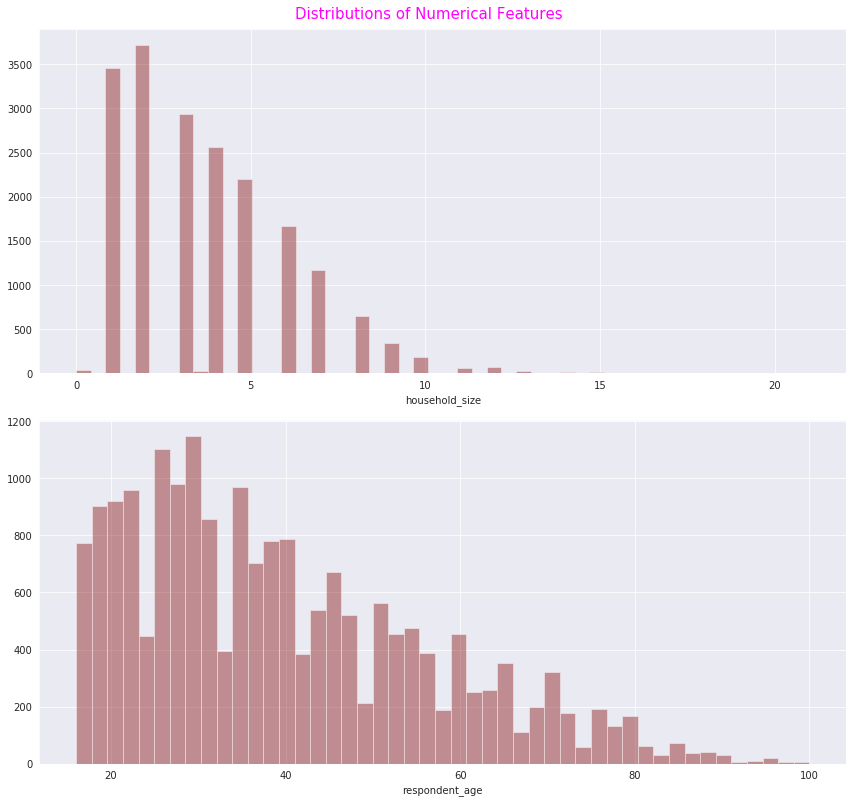

In [0]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=2, ncols = 1, figsize = (12, 11))
fig.suptitle('Distributions of Numerical Features', y= 1.01, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, numerical_columns):
  sns.distplot(df[name], ax = ax, kde = False, color = 'maroon')
plt.tight_layout()

### **Bar charts**

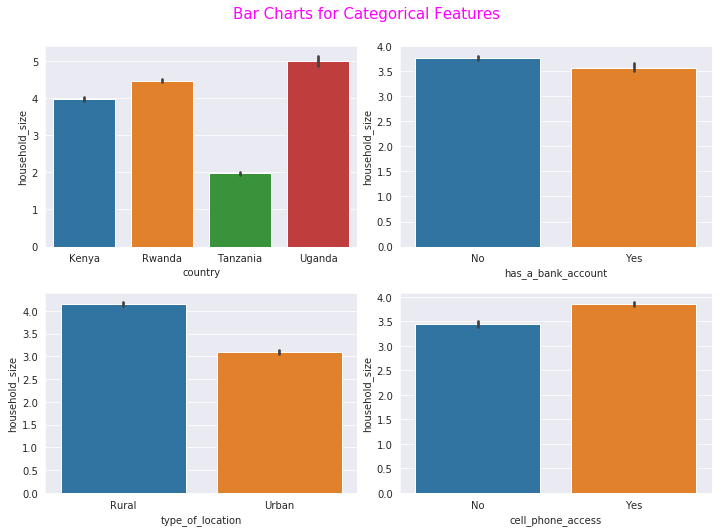

In [0]:
# Bar charts of categorical columns according to the household_size
#
sns.set_style('darkgrid')                                             # Setting the grid style of plots to dark
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))     # Ceating four subplots, in two rows and two columns
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, categorical_columns):   # Iterating through the subplots
  sns.barplot(df[name], df.household_size, ax = ax)                   # Creating a barchart in each subplot
  
plt.tight_layout()  # Fitting the subplots to avoid overlapping

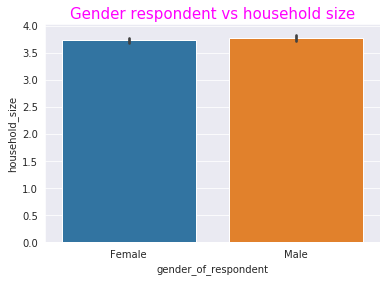

In [0]:
# Creating a bar chart of gender respondent vs the household size
#
sns.barplot(df.gender_of_respondent, df.household_size)
plt.title('Gender respondent vs household size', y = 1, color = 'magenta', fontsize = 15)
plt.show()

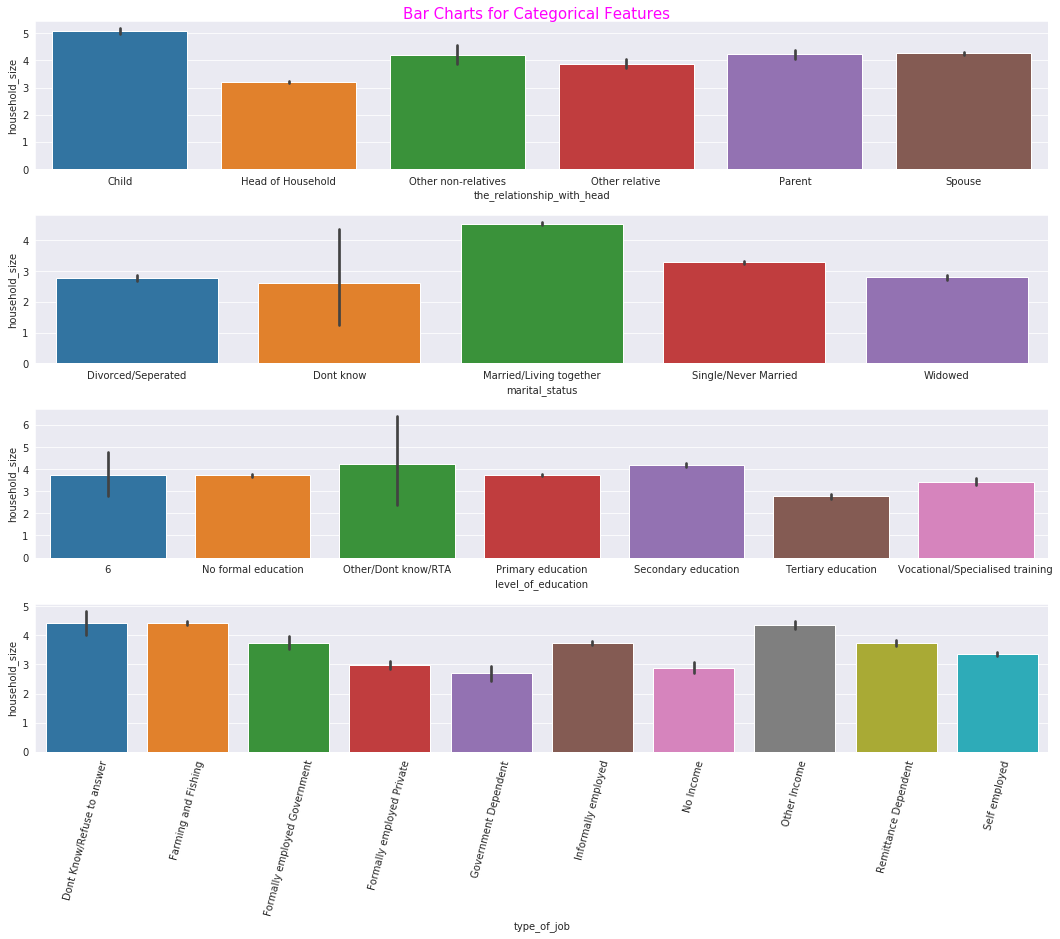

In [0]:
# Bar charts of categorical columns according to the household_size
#
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 13))
fig.suptitle('Bar Charts for Categorical Features', y = 1, color = 'magenta', fontsize = 15)

for ax, column, name in zip(axes.flatten(), df, categorical_columns[5:]):
  sns.barplot(df[name], df.household_size, ax = ax)
  plt.xticks(rotation = 75)
  
plt.tight_layout()

### **Box plots**

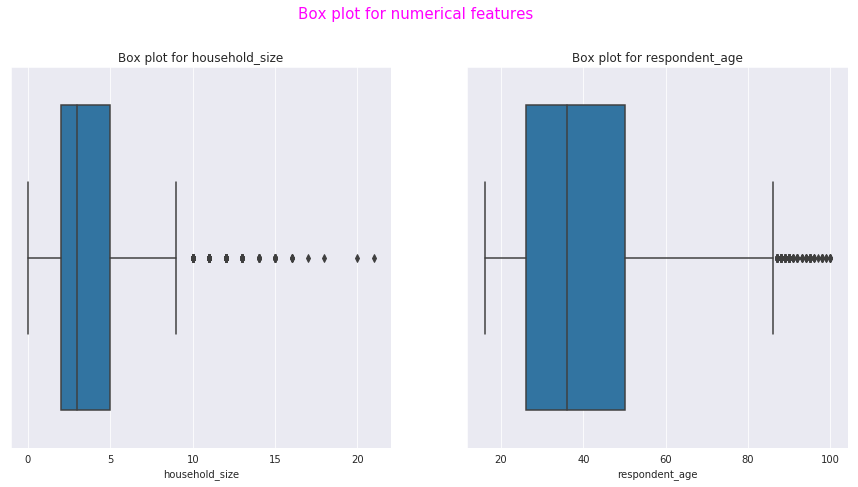

In [0]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
fig.suptitle('Box plot for numerical features', y= 1, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, numerical_columns):
  sns.boxplot(df[name], ax = ax)
  ax.set_title('Box plot for '+ name)

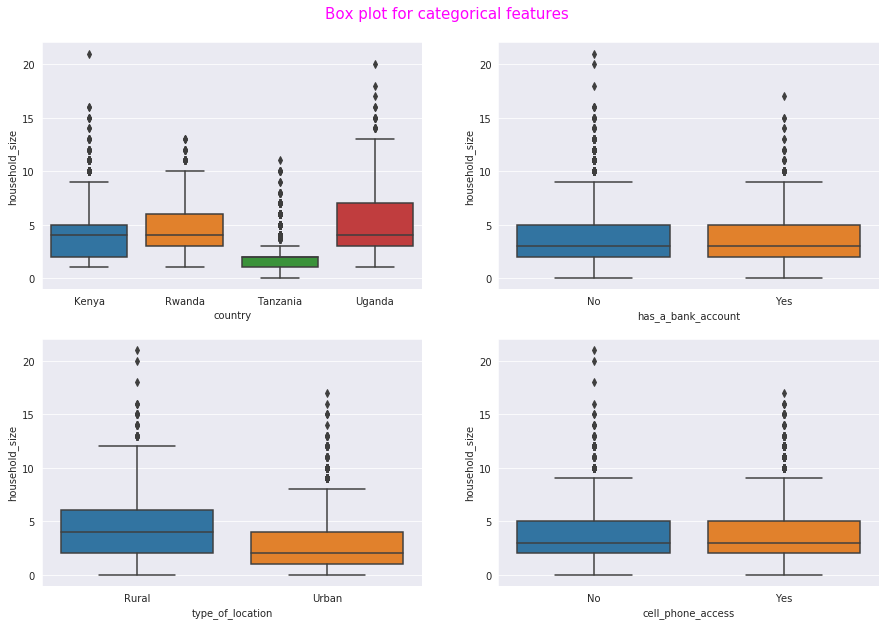

In [0]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for categorical features', y= 0.93, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, categorical_columns):
  sns.boxplot(df[name], df.household_size, ax = ax)

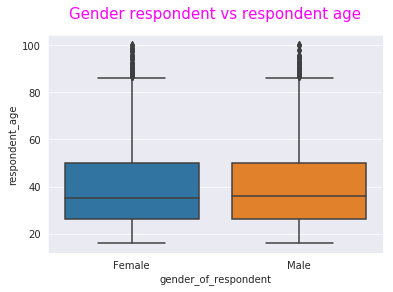

In [0]:
sns.boxplot(df.gender_of_respondent, df.respondent_age)
plt.title('Gender respondent vs respondent age', y= 1.05, color = 'magenta', fontsize = 15)
plt.show()

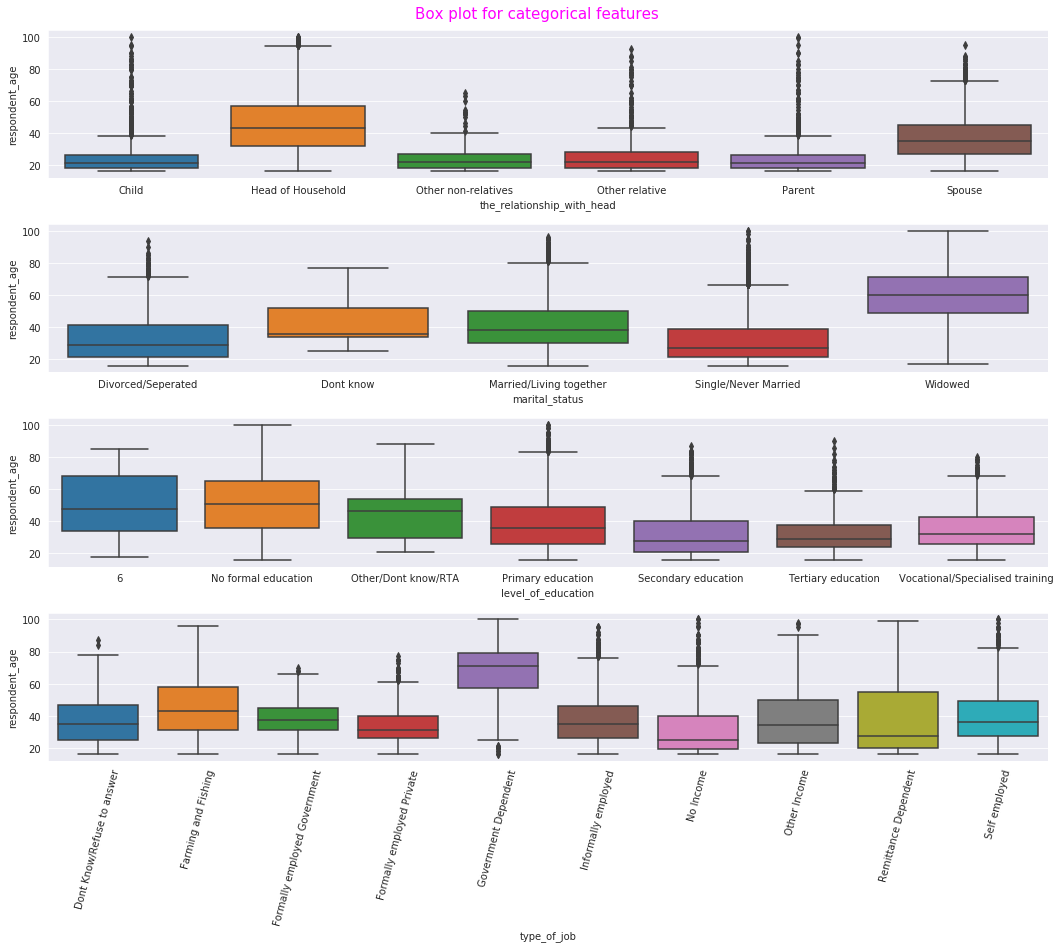

In [0]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 13))
fig.suptitle('Box plot for categorical features', y= 1.01, color = 'magenta', fontsize = 15)

for ax, column, name in zip(axes.flatten(), df, categorical_columns[5:]):
  sns.boxplot(df[name], df.respondent_age, ax = ax)
  plt.xticks(rotation = 75)
  
plt.tight_layout()

### **Pie charts**

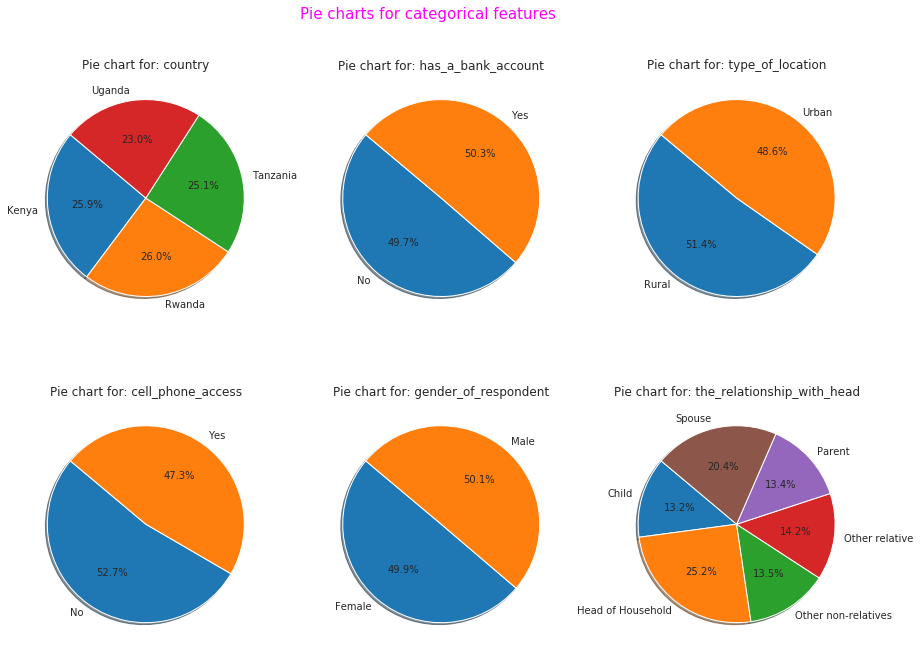

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 11))
fig.suptitle('Pie charts for categorical features', y = 0.95, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, categorical_columns):
  labels = df.groupby(name).respondent_age.mean().index
  data = df.groupby(name).respondent_age.mean().values
  ax.pie(data,
         labels = labels,
         autopct='%1.1f%%',
         shadow=True,
         startangle=140)
  ax.set_title('Pie chart for: '+ name)

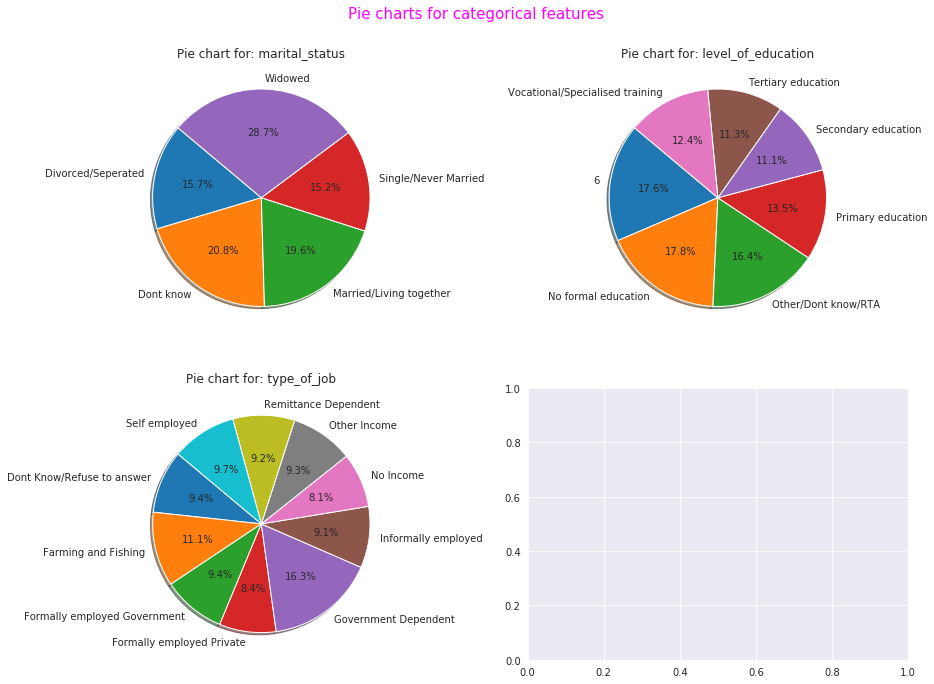

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
fig.suptitle('Pie charts for categorical features', y = 0.95, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, categorical_columns[6:]):
  labels = df.groupby(name).respondent_age.mean().index
  data = df.groupby(name).respondent_age.mean().values
  ax.pie(data,
         labels = labels,
         autopct='%1.1f%%',
         shadow=True,
         startangle=140)
  ax.set_title('Pie chart for: '+ name)

### **Frequency tables**

In [0]:
# Creating Frequency table of each categorical column
# 
for column in categorical_columns:     # Iterating through each column in the categorical columns list
  print('\n')                          # Creating a new line for better readability
  print(df[column].value_counts())     # Printing a frequency table of each categorical column



Rwanda      6707
Kenya       5615
Tanzania    4831
Uganda      1975
Name: country, dtype: int64


No     15985
Yes     3143
Name: has_a_bank_account, dtype: int64


Rural    11748
Urban     7380
Name: type_of_location, dtype: int64


Yes    14126
No      5002
Name: cell_phone_access, dtype: int64


Female    11401
Male       7727
Name: gender_of_respondent, dtype: int64


Head of Household      10624
Spouse                  4731
Child                   1910
Parent                  1021
Other relative           655
Other non-relatives      187
Name: the_relationship_with_head, dtype: int64


Married/Living together    8705
Single/Never Married       6059
Widowed                    2403
Divorced/Seperated         1953
Dont know                     8
Name: marital_status, dtype: int64


Primary education                  9502
No formal education                3906
Secondary education                3823
Tertiary education                 1084
Vocational/Specialised training     779
6  

## Bivariate analysis

### **Scatter plot**

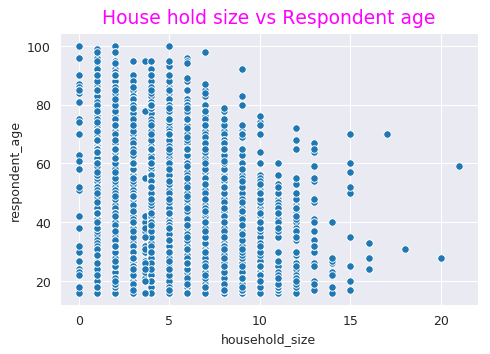

In [0]:
plt.figure(dpi = 90)
sns.scatterplot(df.household_size, df.respondent_age)
plt.title('House hold size vs Respondent age', y= 1.01, color = 'magenta', fontsize = 15)
plt.show()

### **Correlation heatmap**

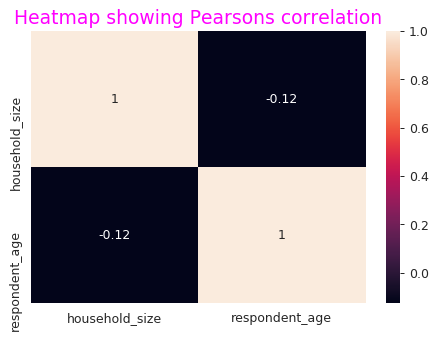

In [0]:
cor = df.corr()

plt.figure(dpi=90)
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.title('Heatmap showing Pearsons correlation', y = 1.05, color = 'magenta', fontsize = 15)
plt.show()

## Multivariate analysis

### **Pairplot to show distributions**

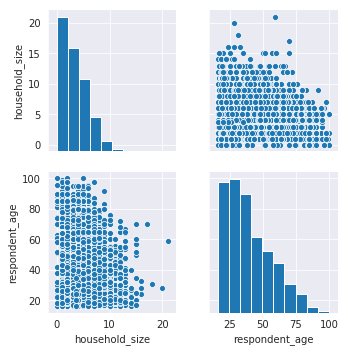

In [0]:
# Creating a pairplot to build histograms and scatter plots.
# The histogram on the diagonal shows the distribution of a single variable
# while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

sns.pairplot(df)
plt.show()

In [0]:
# A very weak relationship between the features can be deduced from the above scatter plot

### **Correlation of variables**

In [0]:
# Finding the correlation between the variables in the dataset.
# When the value is near zero, there is no linear relationship. 
# As the correlation gets closer to plus or minus one, the relationship is stronger. 
# A value of one (or negative one) indicates a perfect linear relationship between two variables.
# 

df.corr()

,household_size,respondent_age
household_size,1.000000,-0.124945
respondent_age,-0.124945,1.000000


In [0]:
# The correlation coefficient of -0.124945 shows a very weak negative relationship between the household size and the respondent age

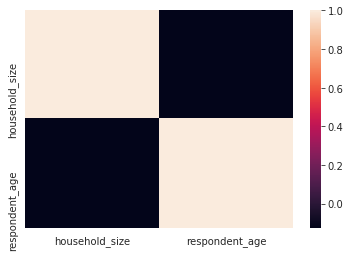

In [0]:
# Ploting the correlation using a heatmap.
# The black colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
#
sns.heatmap(df.corr())
plt.show()

### **Splitting the data into X and y**

In [0]:
# Splitting up the data into an X array that contains the features to train on, and a y array with the target variable
#
X = df.drop('has_a_bank_account', axis = 1)
y = df.iloc[:, 2]

### Encoding categorical features

In [0]:
# Encoding the categorical columns using the get_dummies function
#
X = pd.get_dummies(X)

### **Encoding the target variable**

In [0]:
# Encoding the target variable as linear regression works with numbers only
#
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

### **Splitting the data into training and test sets**

In [0]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

### **Training the model**

In [0]:
# Creating and training the model by fitting the linear regression model on the training data.
#
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Making predictions using Linear Regression**

In [0]:
# Making predictions using the trained model
#
y_pred = regressor.predict(X_test)

### **Performance evaluation**

In [0]:
# Coefficient of determination, R2, is the fraction (percentage) of variation in the response variable Y 
# that is explainable by the predictor variable X. It ranges between 0 (no predictability) to 1 (or 100%) 
# which indicates complete predictability.A high R2 indicates being able to predict response variable with less error.

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

1.0

In [0]:
# An R2 score of 1 indicates a good fit

In [0]:
# Previewing the coefficients and the y intercept of the model
#
(regressor.coef_, regressor.intercept_)

(array([-3.18799091e-15, -9.02056208e-17, -7.74879642e-15, -7.91046990e-15,
        -7.79098467e-15, -8.18087788e-15, -5.00000000e-01,  5.00000000e-01,
        -6.71159520e-17, -2.06970357e-16, -1.52166814e-16,  6.80327258e-17,
         1.71003478e-15,  2.05880710e-15,  1.61467054e-15,  1.92479103e-15,
         1.95344157e-15,  1.86573027e-15,  6.42268603e-17, -2.32878728e-16,
        -1.48344064e-16,  3.10361322e-16,  8.91114553e-17, -2.12177808e-16,
        -1.61626409e-16,  1.26326809e-16, -1.86331826e-16, -3.37184829e-16,
        -8.21933524e-17, -1.47325162e-16,  3.83975206e-16,  5.11472651e-16,
         3.06300453e-16,  6.64670142e-16,  4.83689694e-16,  6.44558192e-16,
         4.60081192e-16,  3.64129300e-16,  3.43671760e-16,  5.55653613e-16]),
 0.5000000000000212)

### **Finding features which are significant in predicting the target variable**

In [0]:
# Using confidence level and significance level, the relationship between the feature and the response can be determined
# A predictor (an independent variable) that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value 
# are related to changes in the response variable. Conversely, a larger (insignificant) p-value suggests that changes 
# in the predictor are not associated with changes in the response.
X2 = sm.add_constant(X.values)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.464e+30
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:14:23   Log-Likelihood:             5.8981e+05
No. Observations:               19128   AIC:                        -1.180e+06
Df Residuals:                   19095   BIC:                        -1.179e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1488   2.85e-16   5.21e+14      0.0

In [0]:
# From the output above, the predictor (independent) variables are allsigninficant because all of their p-values are 0.000.

## Feature reduction and modelling

## Random Forest Classifier without feature reduction

### **Splitting data into X and y**

In [0]:
# Splitting the dataset into independent features and the depandant variable
#
X = df.drop('has_a_bank_account', axis = 1)
y = df.iloc[:, 2]

### **Encoding categorical columns**

In [0]:
# Encoding the categorical columns using the get_dummies function
#
X = pd.get_dummies(X)

### **Splitting data into training and testing sets**

In [0]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### **Standardising the data**

In [0]:
# Standardising the data
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

In [0]:
# Applying PCA
#
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Finding the variance caused by each of the principal components
#
print(pca.explained_variance_ratio_)

[8.89063864e-02 7.23110738e-02 7.14149994e-02 5.45138623e-02
 4.94546843e-02 4.42209495e-02 4.08321169e-02 3.56331007e-02
 3.50010511e-02 3.29225498e-02 3.11299937e-02 2.84160059e-02
 2.73121238e-02 2.61524927e-02 2.61447847e-02 2.55629715e-02
 2.53299641e-02 2.49881045e-02 2.48753800e-02 2.46112717e-02
 2.44826065e-02 2.39894931e-02 2.32264224e-02 2.22686953e-02
 2.07985243e-02 2.03765115e-02 1.62004361e-02 1.48931978e-02
 1.21939243e-02 1.17837740e-02 1.05439169e-02 9.50863104e-03
 1.99010707e-32 6.15937381e-33 5.51102220e-33 3.76072642e-33
 2.71323705e-33 2.11673824e-33 9.16391362e-34 2.44435652e-36]


### **Training the model and making predictions**

In [0]:
# Training and Making Predictions
# The random forest classification has been used to make predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

### **Performance evaluation**

In [0]:
# Performing evaluation
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[2863   55]
 [ 538 1326]]
Accuracy 0.8759933082392305


In [0]:
# RandomForest Classifier model has an accuracy of 87.6% without specifying the number of components in the PCA analysis

## Random Forest Classifier with Principal Component Analysis

In [0]:
# Results when using diffrent Principal Components together with Random Forest Classifier
#

accuracy = {}
for i in np.arange(1, len(X.columns)+1):
  
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Applying PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  accuracy.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
accuracy

{'n_components 1': 'accuracy 81.47218736930155',
 'n_components 10': 'accuracy 86.63739021329987',
 'n_components 11': 'accuracy 91.73985780008364',
 'n_components 12': 'accuracy 89.12588874947721',
 'n_components 13': 'accuracy 80.63571727310749',
 'n_components 14': 'accuracy 88.31033040568799',
 'n_components 15': 'accuracy 81.07486407360936',
 'n_components 16': 'accuracy 91.44709326641572',
 'n_components 17': 'accuracy 91.48891677122542',
 'n_components 18': 'accuracy 88.16394813885402',
 'n_components 19': 'accuracy 78.35633626097867',
 'n_components 2': 'accuracy 81.4512756168967',
 'n_components 20': 'accuracy 89.62777080719364',
 'n_components 21': 'accuracy 86.1564199079883',
 'n_components 22': 'accuracy 91.90715181932246',
 'n_components 23': 'accuracy 92.59723964868256',
 'n_components 24': 'accuracy 78.54454203262233',
 'n_components 25': 'accuracy 90.02509410288582',
 'n_components 26': 'accuracy 87.89209535759097',
 'n_components 27': 'accuracy 91.92806357172731',
 'n_

In [0]:
#Finding the ideal number of principal components for optimal accuracy
maximum = max(accuracy, key=accuracy.get)
print(maximum, accuracy[maximum])

n_components 23 accuracy 92.59723964868256


## Random Forest Classifier with Linear Discriminant Analysis

In [0]:
# Results when using diffrent LDA Components together with the Random Forest Classifier
#

accuracy = {}
for i in np.arange(1, len(X.columns)+1):
  
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Applying LDA
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  lda = LDA(n_components = i)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)

  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  accuracy.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
accuracy

{'n_components 1': 'accuracy 100.0',
 'n_components 10': 'accuracy 100.0',
 'n_components 11': 'accuracy 100.0',
 'n_components 12': 'accuracy 100.0',
 'n_components 13': 'accuracy 100.0',
 'n_components 14': 'accuracy 100.0',
 'n_components 15': 'accuracy 100.0',
 'n_components 16': 'accuracy 100.0',
 'n_components 17': 'accuracy 100.0',
 'n_components 18': 'accuracy 100.0',
 'n_components 19': 'accuracy 100.0',
 'n_components 2': 'accuracy 100.0',
 'n_components 20': 'accuracy 100.0',
 'n_components 21': 'accuracy 100.0',
 'n_components 22': 'accuracy 100.0',
 'n_components 23': 'accuracy 100.0',
 'n_components 24': 'accuracy 100.0',
 'n_components 25': 'accuracy 100.0',
 'n_components 26': 'accuracy 100.0',
 'n_components 27': 'accuracy 100.0',
 'n_components 28': 'accuracy 100.0',
 'n_components 29': 'accuracy 100.0',
 'n_components 3': 'accuracy 100.0',
 'n_components 30': 'accuracy 100.0',
 'n_components 31': 'accuracy 100.0',
 'n_components 32': 'accuracy 100.0',
 'n_components 

In [0]:
#Finding the ideal number of LDA components for optimal accuracy
maximum = max(accuracy, key=accuracy.get)
print(maximum, accuracy[maximum])

n_components 1 accuracy 100.0


## Logistic Regression with Principal Component Analysis

In [0]:
# Results when using diffent Principal Components together with the Logistic regression model
#

accuracy = {}
for i in np.arange(1, len(X.columns)+1):
  
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Applying PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  accuracy.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
accuracy

{'n_components 1': 'accuracy 80.07109995817649',
 'n_components 10': 'accuracy 99.435382685069',
 'n_components 11': 'accuracy 99.93726474278544',
 'n_components 12': 'accuracy 100.0',
 'n_components 13': 'accuracy 99.93726474278544',
 'n_components 14': 'accuracy 100.0',
 'n_components 15': 'accuracy 100.0',
 'n_components 16': 'accuracy 100.0',
 'n_components 17': 'accuracy 100.0',
 'n_components 18': 'accuracy 100.0',
 'n_components 19': 'accuracy 100.0',
 'n_components 2': 'accuracy 80.46842325386866',
 'n_components 20': 'accuracy 100.0',
 'n_components 21': 'accuracy 100.0',
 'n_components 22': 'accuracy 100.0',
 'n_components 23': 'accuracy 100.0',
 'n_components 24': 'accuracy 100.0',
 'n_components 25': 'accuracy 100.0',
 'n_components 26': 'accuracy 100.0',
 'n_components 27': 'accuracy 100.0',
 'n_components 28': 'accuracy 100.0',
 'n_components 29': 'accuracy 100.0',
 'n_components 3': 'accuracy 80.7611877875366',
 'n_components 30': 'accuracy 100.0',
 'n_components 31': 'a

In [0]:
# Accuracy is best with 13 PCA number of components
#

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Standardising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 13)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and Making Predictions
# The random forest classification classifier has been used to make predictions.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performing evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(cm)
print(acc)

[[2918    0]
 [   0 1864]]
1.0


## Logistic Regression with Linear Discriminant Analysis

In [0]:
# Results when using diffrent LDA Components together with the Logistic regression model
#

accuracy = {}
for i in np.arange(1, len(X.columns)+1):
  
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Applying LDA
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  lda = LDA(n_components = i)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)

  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  accuracy.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
accuracy

{'n_components 1': 'accuracy 100.0',
 'n_components 10': 'accuracy 100.0',
 'n_components 11': 'accuracy 100.0',
 'n_components 12': 'accuracy 100.0',
 'n_components 13': 'accuracy 100.0',
 'n_components 14': 'accuracy 100.0',
 'n_components 15': 'accuracy 100.0',
 'n_components 16': 'accuracy 100.0',
 'n_components 17': 'accuracy 100.0',
 'n_components 18': 'accuracy 100.0',
 'n_components 19': 'accuracy 100.0',
 'n_components 2': 'accuracy 100.0',
 'n_components 20': 'accuracy 100.0',
 'n_components 21': 'accuracy 100.0',
 'n_components 22': 'accuracy 100.0',
 'n_components 23': 'accuracy 100.0',
 'n_components 24': 'accuracy 100.0',
 'n_components 25': 'accuracy 100.0',
 'n_components 26': 'accuracy 100.0',
 'n_components 27': 'accuracy 100.0',
 'n_components 28': 'accuracy 100.0',
 'n_components 29': 'accuracy 100.0',
 'n_components 3': 'accuracy 100.0',
 'n_components 30': 'accuracy 100.0',
 'n_components 31': 'accuracy 100.0',
 'n_components 32': 'accuracy 100.0',
 'n_components 

## K Nearest Neighbors

In [0]:
# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data, as it would be in a production application.
# To create training and test splits, execute the following script
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# The above script splits the dataset into 80% train data and 20% test data. 

In [0]:
# The following script performs feature scaling:
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Determining the optimal number of neighbors by comparing errors
#
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# The above script executes a loop from 1 to 40. In each iteration the mean error 
# for predicted values of test set is calculated and the result is appended to the error list.

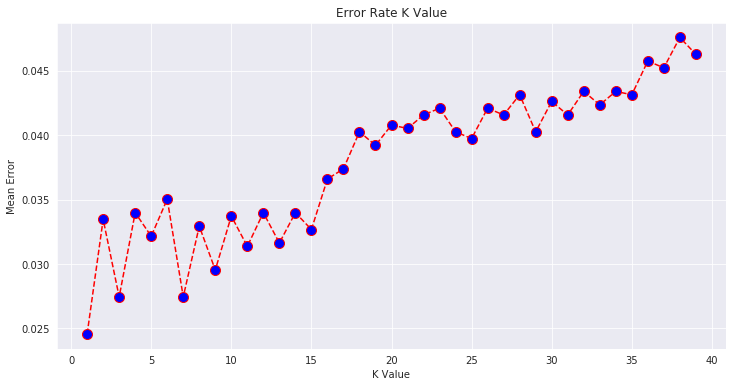

In [0]:
# Plotting the error values against K values
# 
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40),
         error, color='red',
         linestyle='dashed',
         marker='o',
         markerfacecolor='blue',
         markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show() 

In [0]:
# Training, making predictions and measuring the performance of the model
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn_new = KNeighborsClassifier(n_neighbors=2)
knn_new.fit(X_train, y_train)
y_pred = knn_new.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# The second line imports the metrics for measuring the performance of the model
# In the third line, this class is initialized with one parameter, i.e. n_neigbours which has been set to two, because the target variable has two classes

[[2330   15]
 [ 113 1368]]
0.9665446941975954
              precision    recall  f1-score   support

       Rural       0.95      0.99      0.97      2345
       Urban       0.99      0.92      0.96      1481

    accuracy                           0.97      3826
   macro avg       0.97      0.96      0.96      3826
weighted avg       0.97      0.97      0.97      3826



In [0]:
# From the above analysis it can be observed that the Logistic Regression model together with the Linear Discriminat Analysis reduction technique
# has the highest accuracy score when predicting whether an individual has a bank account or not.
# Linear Discriminant Analysis produces better predictions when compared to Principal Components Analysis.
# N/B > This model should be handled with care, as it might lead to overfitting when predicting new data.